# **Colab**

In [17]:
# === 1. Montagem do Google Drive e definição dos caminhos ===
from google.colab import drive
drive.mount('/content/drive')
arquivo_codificado = '/content/drive/My Drive/Colab/cb-classificador/data/dados_codificados.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# === 2. Importação de bibliotecas ===
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# === 3. Função para treinar, otimizar hiperparâmetros e avaliar um modelo de classificação ===
def treinar_otimizar_avaliar(model, param_grid, df_dados, folds=10, seed=42):

    print("\nAlgoritmo:")
    print(model)

    # Separa variáveis preditoras (X) e alvo (y)
    X = df_dados.drop(columns=['categoria'])
    y = df_dados['categoria']

    # Divide os dados em treinamento e teste com estratificação
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

    # Informa o tamanho dos conjuntos de dados, treinamento e teste
    print(f"\nTamanho do Conjunto de Dados : {len(df_dados)} amostras")
    print(f"Tamanho do Conjunto de Treino: {len(X_train)} amostras")
    print(f"Tamanho do Conjunto de Teste : {len(X_test)} amostras")

    # Configura random_state se o modelo suportar
    if "random_state" in model.get_params():
        model.set_params(random_state=seed)

    # Validação cruzada com o modelo padrão
    cv_strategy = RepeatedStratifiedKFold(n_repeats=3, n_splits=folds, random_state=seed)
    default_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
    print("\nConjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):")
    print(f"Acurácia: {np.mean(default_scores) * 100:.2f}%")

    # Configura GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_strategy, scoring='accuracy', error_score=0)

    # Registra o início da execução
    start_time = time.time()

    # Busca melhores hiperparâmetros
    grid_result = grid_search.fit(X_train, y_train)

    # Registra o final da execução
    end_time = time.time()

    # Tempo de execução
    total_seconds = end_time - start_time
    hours = total_seconds // 3600
    minutes = (total_seconds % 3600) // 60
    seconds = total_seconds % 60

    # Quantidade de combinações de valores de hiperparâmetros
    num_combinations = len(grid_result.cv_results_['params'])

    # Resultados do GridSearchCV
    print("\nConjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):")
    print(f"Acurácia: {grid_result.best_score_ * 100:.2f}%")
    print(f"Tempo de execução do ajuste de hiperparâmetros: {int(hours)}:{int(minutes):02}:{int(seconds):02}")
    print(f'Quantidade de combinações de hiperparâmetros: {num_combinations}')
    print(f"Melhores hiperparâmetros: {grid_result.best_params_}")

    # Avaliação no conjunto de teste
    y_pred = grid_result.best_estimator_.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    score = f1_score(y_test, y_pred, average='macro')
    print("\nConjunto de Teste - Resultados de Predições (melhores hiperparâmetros):")
    print(f"Acurácia: {accuracy * 100:.2f}%")
    print(f"Precisão: {precision * 100:.2f}%")
    print(f"Recall  : {recall * 100:.2f}%")
    print(f"F1-score: {score * 100:.2f}%")
    print("\nConjunto de Teste - Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("\nConjunto de Teste - Matriz de Confusão:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("\n")

    # Visualização da matriz de confusão
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.ylabel('Classe Real')
    plt.xlabel('Classe Predita')
    plt.show()


In [20]:
# === 4. Leitura do arquivo de entrada ===
df_dados = pd.read_csv(arquivo_codificado)

In [21]:
len(df_dados)

1914

In [22]:
len(df_dados.columns)

186

In [23]:
df_dados['categoria'].value_counts()

,count
categoria,
XX,1110
CB,804



Algoritmo:
KNeighborsClassifier()

Tamanho do Conjunto de Dados : 1914 amostras
Tamanho do Conjunto de Treino: 1531 amostras
Tamanho do Conjunto de Teste : 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 96.56%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 97.54%
Tempo de execução do ajuste de hiperparâmetros: 0:01:42
Quantidade de combinações de hiperparâmetros: 54
Melhores hiperparâmetros: {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 98.43%
Precisão: 98.48%
Recall  : 98.31%
F1-score: 98.39%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.99      0.98      0.98       161
          XX       0.98      0.99      0.99       222

    accuracy                           0.98       

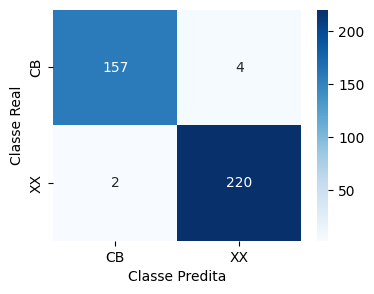

In [24]:
# === K N Neighbors === (54)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],                            # Padrão: 5
    'weights': ['uniform', 'distance'],                  # Padrão: 'uniform'
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],       # Padrão: 'auto'
    'metric': ['minkowski', 'euclidean', 'manhattan']    # Padrão: 'minkowski'
}
treinar_otimizar_avaliar(model, param_grid, df_dados)


Algoritmo:
ComplementNB()

Tamanho do Conjunto de Dados : 1914 amostras
Tamanho do Conjunto de Treino: 1531 amostras
Tamanho do Conjunto de Teste : 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 96.26%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 96.89%
Tempo de execução do ajuste de hiperparâmetros: 0:00:02
Quantidade de combinações de hiperparâmetros: 7
Melhores hiperparâmetros: {'alpha': 0.01}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 97.91%
Precisão: 98.04%
Recall  : 97.69%
F1-score: 97.85%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.99      0.96      0.97       161
          XX       0.97      0.99      0.98       222

    accuracy                           0.98       383
   macro avg       0.98      0.98      0.98       383
weighted avg       0.98 

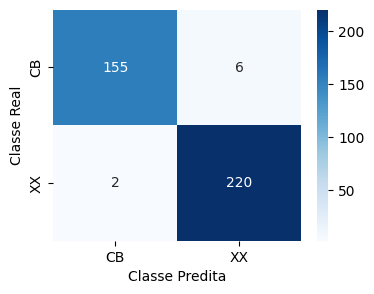

In [29]:
# === Naive Bayes === (7)
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],    # Padrão: 1.0
}
treinar_otimizar_avaliar(model, param_grid, df_dados)


Algoritmo:
DecisionTreeClassifier()

Tamanho do Conjunto de Dados : 1914 amostras
Tamanho do Conjunto de Treino: 1531 amostras
Tamanho do Conjunto de Teste : 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 97.45%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 95.89%
Tempo de execução do ajuste de hiperparâmetros: 0:00:21
Quantidade de combinações de hiperparâmetros: 64
Melhores hiperparâmetros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 97.39%
Precisão: 97.32%
Recall  : 97.32%
F1-score: 97.32%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.97      0.97      0.97       161
          XX       0.98      0.98      0.98       2

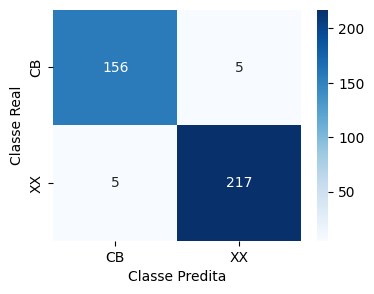

In [30]:
# === Decision Tree === (64)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],    # Padrão: 'gini'
    'min_samples_split': [2, 5],         # Padrão: 2
    'min_samples_leaf': [1, 2],          # Padrão: 1
    'max_depth': [10, 20, 30, 40],       # Padrão: None
    'max_features': ['sqrt', 'log2'],    # Padrão: None
    'class_weight': ['balanced']         # Padrão: None
}
treinar_otimizar_avaliar(model, param_grid, df_dados)


Algoritmo:
LogisticRegression()

Tamanho do Conjunto de Dados : 1914 amostras
Tamanho do Conjunto de Treino: 1531 amostras
Tamanho do Conjunto de Teste : 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 96.60%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 97.80%
Tempo de execução do ajuste de hiperparâmetros: 0:01:25
Quantidade de combinações de hiperparâmetros: 27
Melhores hiperparâmetros: {'C': 10.0, 'class_weight': 'balanced', 'max_iter': 80, 'penalty': 'l2', 'solver': 'newton-cholesky'}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 98.17%
Precisão: 98.09%
Recall  : 98.17%
F1-score: 98.13%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.98      0.98      0.98       161
          XX       0.99      0.98      0.98       222

    accuracy                           

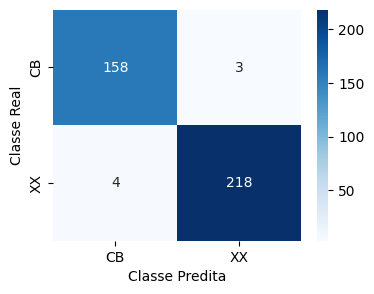

In [31]:
# === Log Regression === (27)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
param_grid = {
    'solver': ['lbfgs', 'newton-cholesky', 'saga'],    # Padrão = 'lbfgs'
    'penalty': ['l2'],                                 # Padrão = 'l2'
    'C': [0.1, 1.0, 10.0],                             # Padrão = 1.0
    'max_iter': [80, 100, 120],                        # Padrão = 100
    'class_weight': ['balanced']                       # Padrão = None
}
treinar_otimizar_avaliar(model, param_grid, df_dados)


Algoritmo:
SVC()

Tamanho do Conjunto de Dados : 1914 amostras
Tamanho do Conjunto de Treino: 1531 amostras
Tamanho do Conjunto de Teste : 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 96.69%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 98.17%
Tempo de execução do ajuste de hiperparâmetros: 0:02:38
Quantidade de combinações de hiperparâmetros: 40
Melhores hiperparâmetros: {'C': 100, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 98.43%
Precisão: 98.39%
Recall  : 98.39%
F1-score: 98.39%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.98      0.98      0.98       161
          XX       0.99      0.99      0.99       222

    accuracy                           0.98       383
   macro avg       0.98      

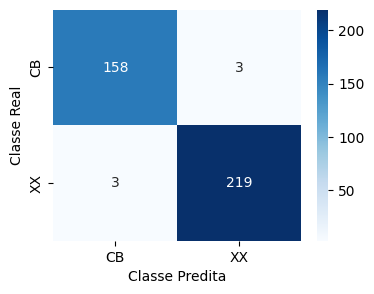

In [32]:
# === Sup Vector Machine === (40)
from sklearn.svm import SVC
model = SVC()
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],    # Padrão: 'rbf'
    'C': [0.01, 0.1, 1, 10, 100],                      # Padrão: 1
    'gamma': ['scale', 'auto'],                        # Padrão: 'scale'
    'class_weight': ['balanced']                       # Padrão: None
}
treinar_otimizar_avaliar(model, param_grid, df_dados)


Algoritmo:
RandomForestClassifier()

Tamanho do Conjunto de Dados : 1914 amostras
Tamanho do Conjunto de Treino: 1531 amostras
Tamanho do Conjunto de Teste : 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 98.02%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 98.32%
Tempo de execução do ajuste de hiperparâmetros: 0:17:32
Quantidade de combinações de hiperparâmetros: 96
Melhores hiperparâmetros: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 98.17%
Precisão: 98.26%
Recall  : 98.00%
F1-score: 98.12%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.99      0.97      0.98       161
          XX       0.98      0

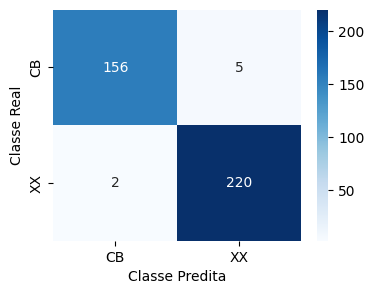

In [34]:
# === Random Forest === (96)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],    # Padrão: 'gini'
    'n_estimators': [100, 200],          # Padrão: 100
    'max_depth': [10, 20, 30],           # Padrão: None
    'min_samples_split': [2, 5],         # Padrão: 2
    'min_samples_leaf': [1, 2],          # Padrão: 1
    'max_features': ['sqrt', 'log2'],    # Padrão: 'sqrt'
    'class_weight': ['balanced']         # Padrão: None
}
treinar_otimizar_avaliar(model, param_grid, df_dados)


Algoritmo:
GradientBoostingClassifier()

Tamanho do Conjunto de Dados : 1914 amostras
Tamanho do Conjunto de Treino: 1531 amostras
Tamanho do Conjunto de Teste : 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 97.37%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 98.00%
Tempo de execução do ajuste de hiperparâmetros: 0:16:40
Quantidade de combinações de hiperparâmetros: 96
Melhores hiperparâmetros: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 97.65%
Precisão: 97.72%
Recall  : 97.46%
F1-score: 97.58%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.98      0.96      0.97       161
          XX       0.97      0.99      0.98      

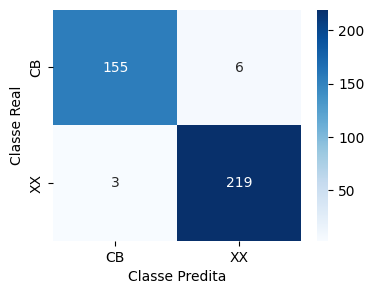

In [35]:
# === Grad Boosting === (96)
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],                   # Padrão: 100
    'criterion': ['friedman_mse', 'squared_error'],    # Padrão: 'friedman_mse'
    'max_features': ['sqrt', 'log2'],                  # Padrão: None
    'max_depth': [3, 5],                               # Padrão: 3
    'min_samples_split': [2, 5],                       # Padrão: 2
    'min_samples_leaf': [1, 2]                         # Padrão: 1
}
treinar_otimizar_avaliar(model, param_grid, df_dados)


Algoritmo:
Perceptron()

Tamanho do Conjunto de Dados : 1914 amostras
Tamanho do Conjunto de Treino: 1531 amostras
Tamanho do Conjunto de Teste : 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 96.78%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 97.04%
Tempo de execução do ajuste de hiperparâmetros: 0:00:17
Quantidade de combinações de hiperparâmetros: 32
Melhores hiperparâmetros: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 50, 'penalty': 'elasticnet'}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 97.13%
Precisão: 96.90%
Recall  : 97.27%
F1-score: 97.07%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.95      0.98      0.97       161
          XX       0.99      0.96      0.97       222

    accuracy                           0.97       383
   macro avg       0.97

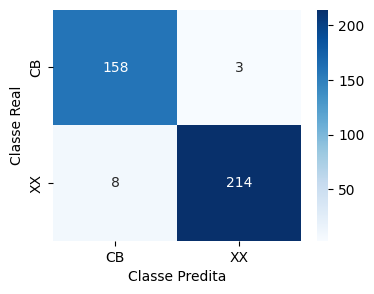

In [36]:
# === SL Perceptron === (32)
from sklearn.linear_model import Perceptron
model = Perceptron()
param_grid = {
    'penalty': ['l2', 'elasticnet'],     # Padrão: None
    'max_iter': [50, 100, 500, 1000],    # Padrão: 1000
    'alpha': [0.0001, 0.001],            # Padrão: 0.0001
    'eta0': [0.1, 1.0]                   # Padrão: 1.0
}
treinar_otimizar_avaliar(model, param_grid, df_dados)


Algoritmo:
MLPClassifier()

Tamanho do Conjunto de Dados : 1914 amostras
Tamanho do Conjunto de Treino: 1531 amostras
Tamanho do Conjunto de Teste : 383 amostras

Conjunto de Treinamento - Resultados da Validação Cruzada (hiperparâmetros padrão):
Acurácia: 98.13%

Conjunto de Treinamento - Resultados da Validação Cruzada (melhores hiperparâmetros):
Acurácia: 98.24%
Tempo de execução do ajuste de hiperparâmetros: 0:25:01
Quantidade de combinações de hiperparâmetros: 24
Melhores hiperparâmetros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (25,), 'max_iter': 300, 'solver': 'adam'}

Conjunto de Teste - Resultados de Predições (melhores hiperparâmetros):
Acurácia: 98.69%
Precisão: 98.79%
Recall  : 98.53%
F1-score: 98.66%

Conjunto de Teste - Relatório de Classificação:
              precision    recall  f1-score   support

          CB       0.99      0.98      0.98       161
          XX       0.98      1.00      0.99       222

    accuracy                           0.99

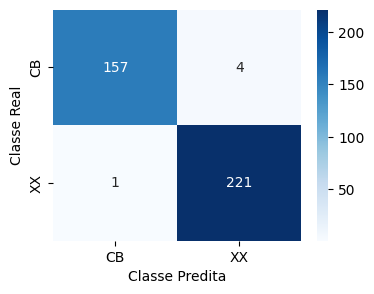

In [37]:
# === ML Perceptron === (24)
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(25,), (100,)],         # Padrão: (100,)
    'activation': ['relu', 'tanh', 'logistic'],    # Padrão: 'relu'
    'solver': ['adam'],                            # Padrão: 'adam'
    'max_iter': [200, 300],                        # Padrão: 200
    'alpha': [0.0001, 0.001]                       # Padrão: 0.0001
}
treinar_otimizar_avaliar(model, param_grid, df_dados)